In [5]:
!pip install upgrade scikit-learn
import numpy as np
import pandas as pd
import csv
import os
!pip install tabulate
import tabulate
from sklearn.preprocessing import LabelEncoder
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
get_ipython().magic('matplotlib inline')
matplotlib.rcParams.update({'font.size': 12})
matplotlib.rc('xtick', labelsize=8) 
matplotlib.rc('ytick', labelsize=8)
np.random.seed(10)

  Could not find a version that satisfies the requirement upgrade (from versions: )
No matching distribution found for upgrade


In [0]:
one = pd.read_csv('one.csv')
two = pd.read_csv('two.csv')
three = pd.read_csv('three.csv')
four = pd.read_csv('four.csv')

In [0]:
dd= pd.concat([one,two,three,four])

In [8]:
len(dd)

1881816

In [0]:
d = pd.concat([one,two,three,four])

In [10]:
missing_data = d.isnull().sum().to_frame(name='Missing_Count').reset_index()
missing_data['Missing_percent'] = (missing_data['Missing_Count']/d.shape[0])*100
missing_data = missing_data.sort_values(by='Missing_percent', axis=0, ascending=True)
features = missing_data['index'][(missing_data.Missing_percent<99.38)]
len(features)

65

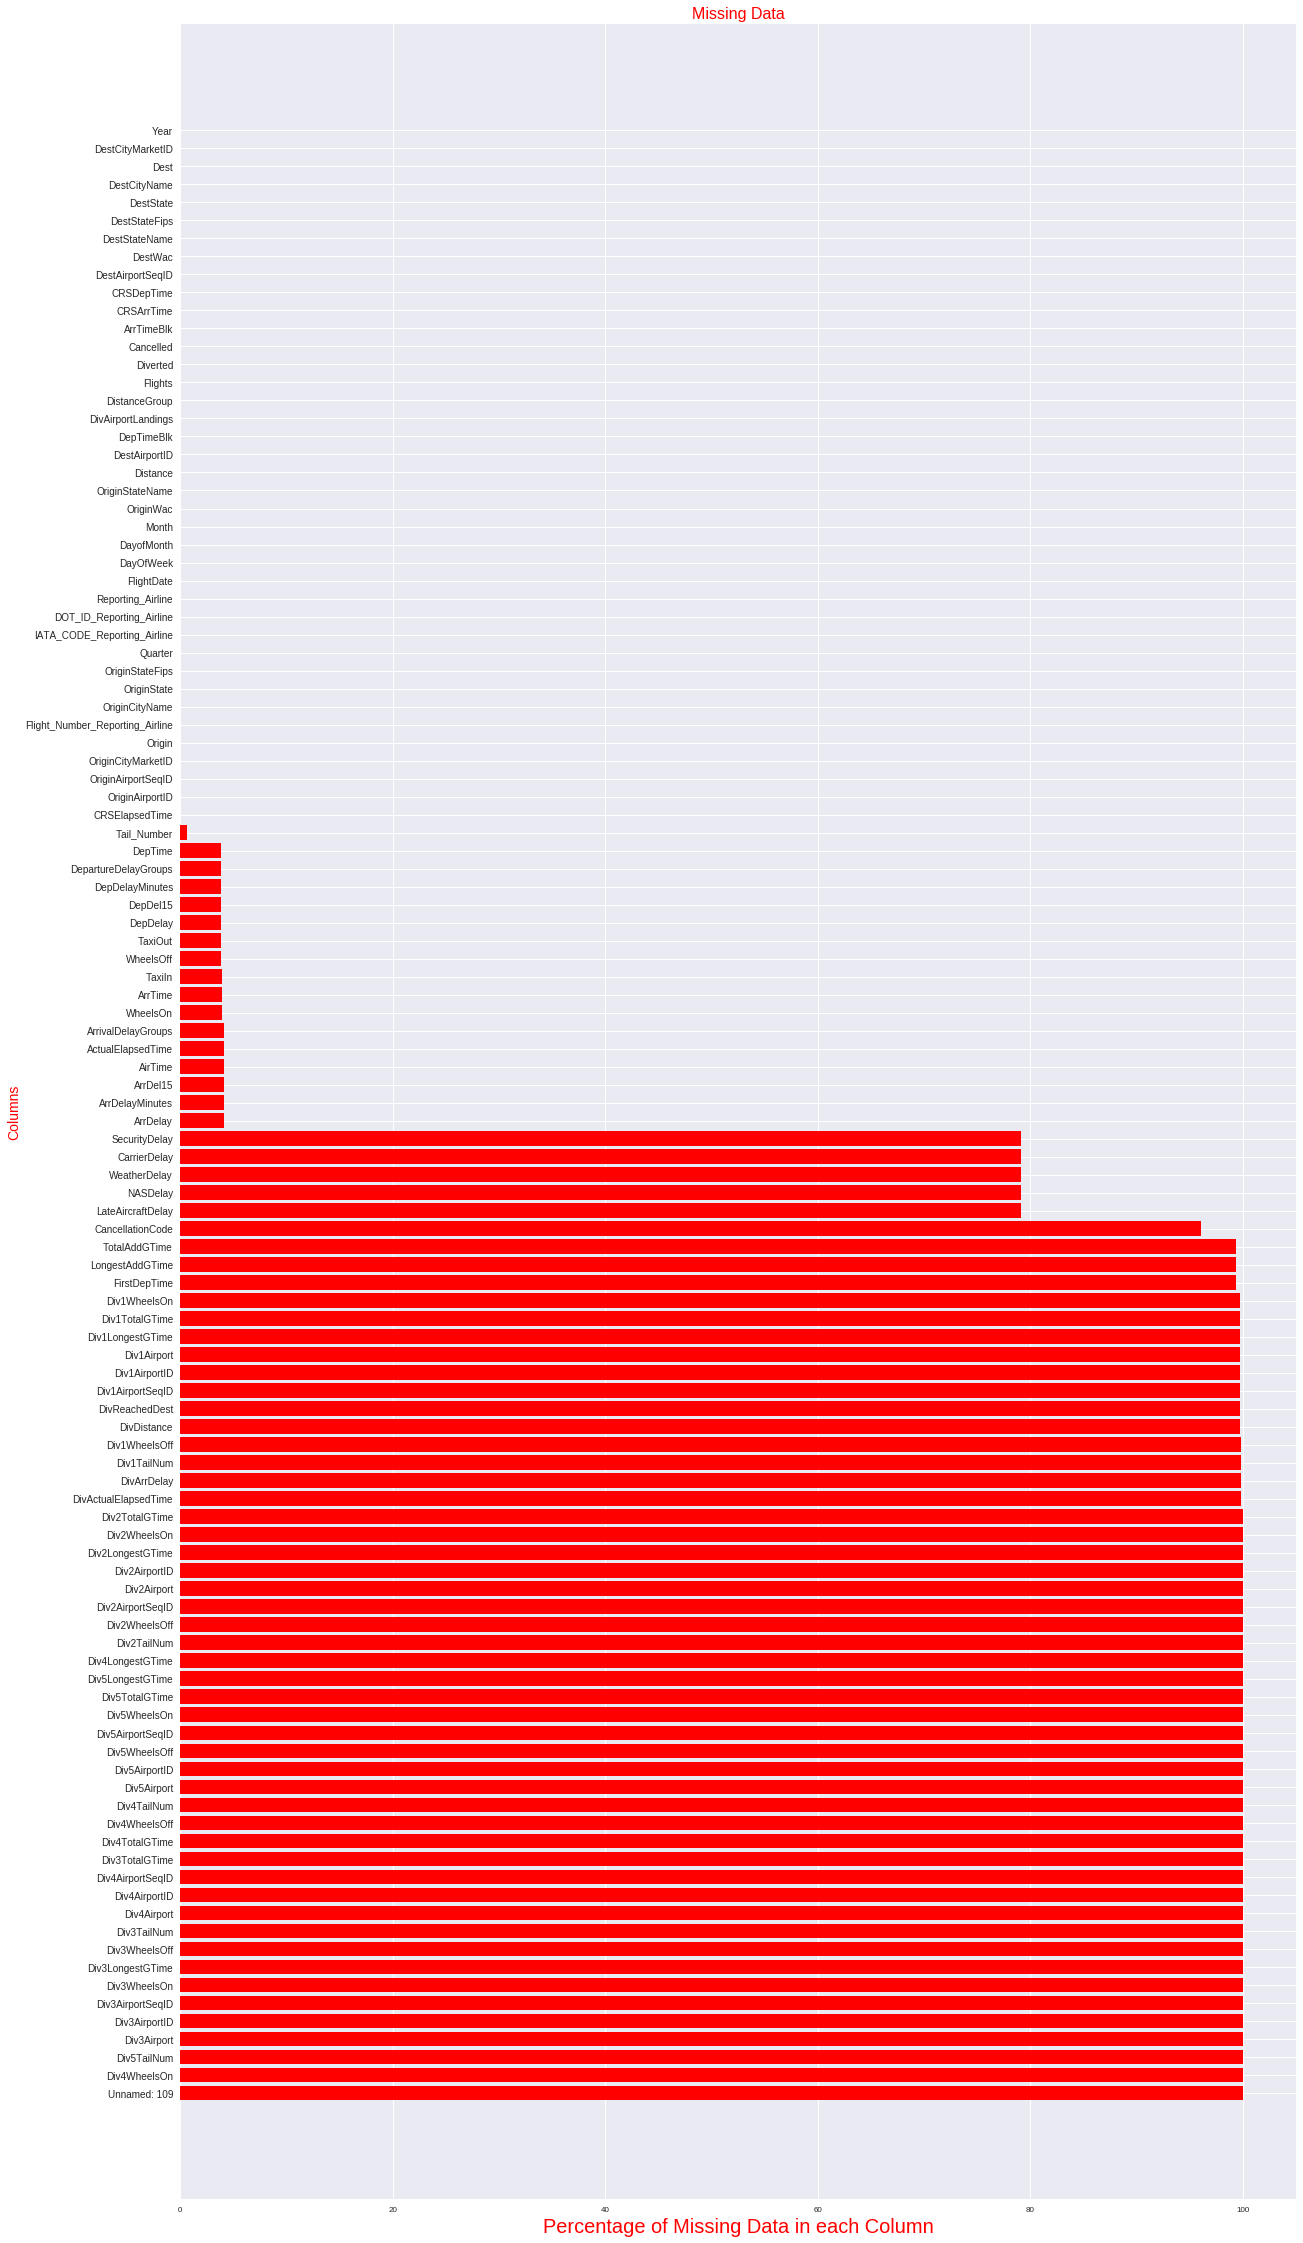

In [11]:
fig, ax = plt.subplots(figsize=(20,40))
ax.barh(range(d.shape[1]), missing_data.Missing_percent.values, align='center',color='Red')

ax.set_yticks(range(d.shape[1]))
ax.set_yticklabels(missing_data['index'].values,rotation =0,linespacing =20, fontsize =10)
ax.invert_yaxis()  

ax.set_xlabel('Percentage of Missing Data in each Column',fontsize=20, color='red')
ax.set_ylabel('Columns',fontsize=14, color='red')
ax.set_title('Missing Data',fontsize=16, color='red')

plt.show()

In [0]:
d = d[features]

In [13]:
len(d)

1881816

In [0]:
d['Flight_Status'] = 0
d.loc[d.DepDel15==1.0 ,'Flight_Status'] = 1
d.loc[d.ArrDel15==1.0,'Flight_Status'] = 1
d.loc[d.Cancelled==1.0, ['Flight_Status']] = 1
d['Flight_Status'] = d['Flight_Status'].astype(int)
d['Status'] = np.where(d['Flight_Status']==1,'Delayed', 'On Time')

In [0]:
days = {1:'Monday',2:'Tuesday',3:'Wedsday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}

d['day'] = d['DayOfWeek'].apply(lambda x: days[x])


Status
Delayed     542204
On Time    1339612
Name: Status, dtype: int64


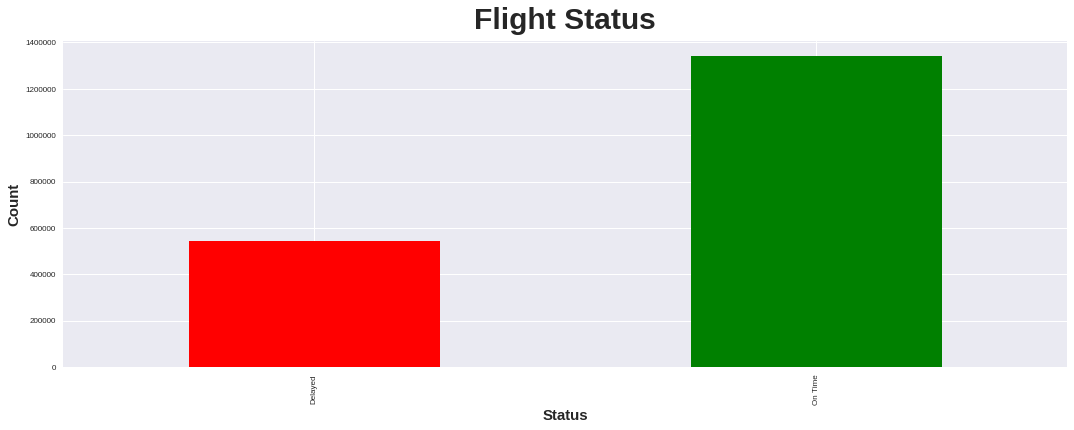

In [16]:
plt.rc("figure", figsize=(18, 6))
c = d.groupby('Status')
c['Status'].count().plot(kind='bar', color =['red', 'green'])
plt.title('Flight Status',fontsize=30,fontweight="bold", va='bottom')
plt.ylabel('Count',fontsize=15,fontweight="bold")
plt.xlabel('Status',fontsize=15,fontweight="bold")
print(c['Status'].count())
plt.show()

In [0]:
d= d.reset_index()
d['index'] = d.index +1

In [18]:
d.pivot_table(values=['index'], index='DayOfWeek', columns='Status', aggfunc=lambda x: len(x)).reset_index()

DayOfWeek   index        
Status           Delayed On Time
0              1   73888  194770
1              2   73535  196944
2              3   85598  206937
3              4   97291  208208
4              5   91995  196078
5              6   54818  155147
6              7   65079  181528

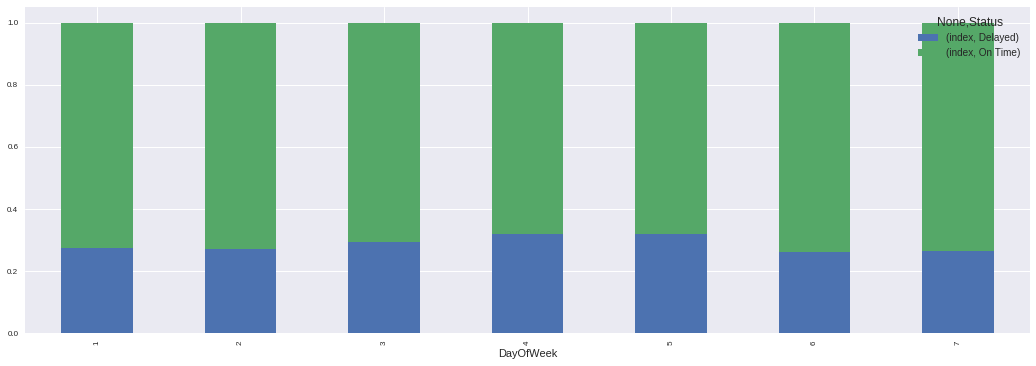

In [19]:
tps = d.pivot_table(values=['index'], index='DayOfWeek', columns='Status', aggfunc=lambda x: len(x))

tps = tps.div(tps.sum(1), axis=0)
tps.plot(kind='bar', stacked=True)
tps
plt.show()

In [20]:
d['Origin'].nunique()

313

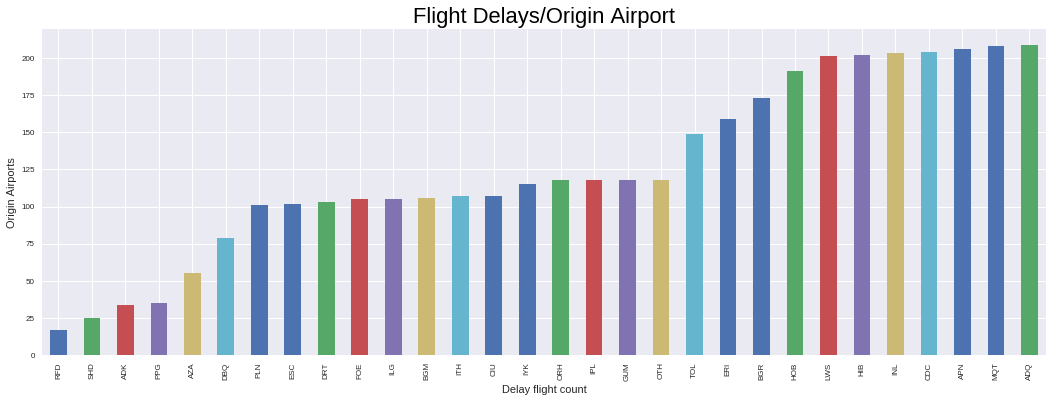

In [21]:
d.groupby('Origin')['index'].count().sort_values(ascending=True)[:30].plot(kind='bar')
plt.xlabel('Delay flight count')
plt.ylabel('Origin Airports')
plt.title('Flight Delays/Origin Airport',size=22,color="black")
plt.show()

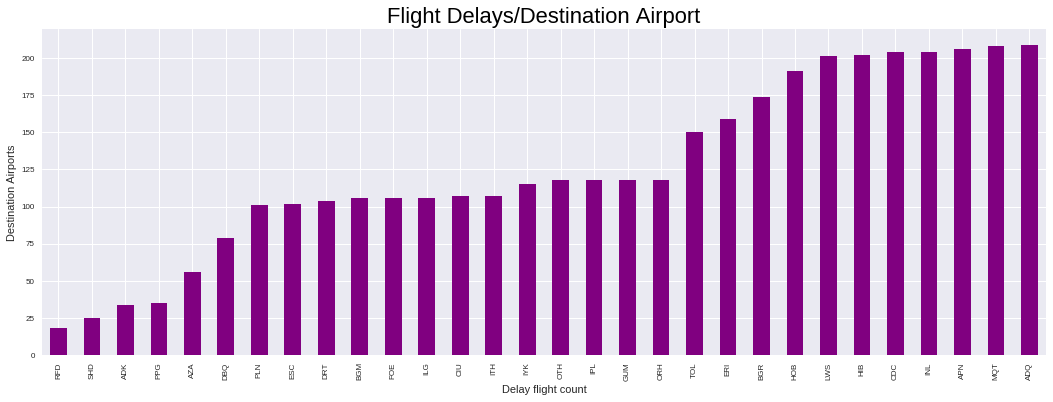

In [22]:
d.groupby('Dest')['index'].count().sort_values(ascending=True)[:30].plot(kind='bar',color='Purple')
plt.xlabel('Delay flight count')
plt.ylabel('Destination Airports')
plt.title('Flight Delays/Destination Airport',size=22,color="black")
plt.savefig('fldelay.png',dpi=1200)

In [23]:
d['IATA_CODE_Reporting_Airline'].unique()

array(['9E', 'AA', 'AS', 'B6', 'DL', 'US', 'UA', 'VX', 'WN', 'YV', 'MQ',
       'FL', 'EV', 'OO', 'HA', 'F9'], dtype=object)

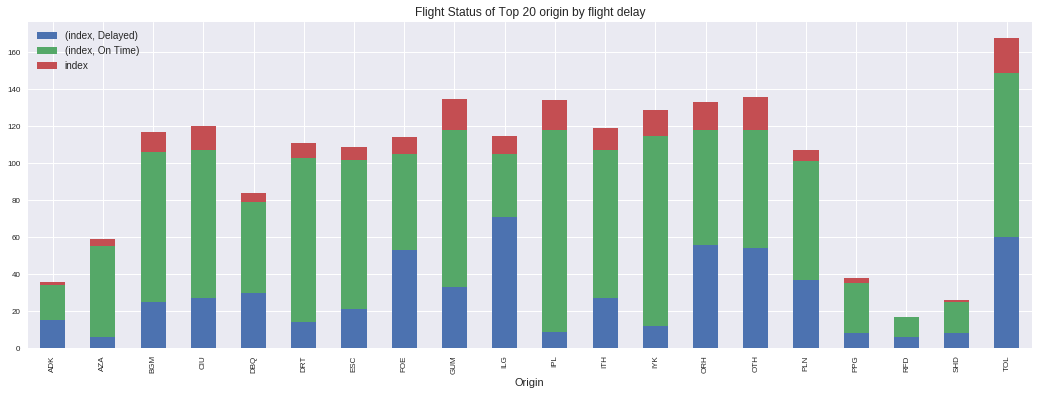

In [24]:
s = d.pivot_table(values=['index'], index='Origin', columns='Status', aggfunc=lambda x: len(x)).reset_index()
d2  = d.groupby('Origin')['index'].count().sort_values(ascending=True)[:20].to_frame().reset_index()['Origin']
d2 = d2.to_frame().reset_index()
s = pd.merge(s,d2, on ='Origin', how ='right')
s = s.set_index('Origin')
s.plot(kind='bar',stacked=True,title="Flight Status of Top 20 origin by flight delay",legend=True,)
plt.show()

In [25]:
d.columns

Index(['index', 'Year', 'DestCityMarketID', 'Dest', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac',
       'DestAirportSeqID', 'CRSDepTime', 'CRSArrTime', 'ArrTimeBlk',
       'Cancelled', 'Diverted', 'Flights', 'DistanceGroup',
       'DivAirportLandings', 'DepTimeBlk', 'DestAirportID', 'Distance',
       'OriginStateName', 'OriginWac', 'Month', 'DayofMonth', 'DayOfWeek',
       'FlightDate', 'Reporting_Airline', 'DOT_ID_Reporting_Airline',
       'IATA_CODE_Reporting_Airline', 'Quarter', 'OriginStateFips',
       'OriginState', 'OriginCityName', 'Flight_Number_Reporting_Airline',
       'Origin', 'OriginCityMarketID', 'OriginAirportSeqID', 'OriginAirportID',
       'CRSElapsedTime', 'Tail_Number', 'DepTime', 'DepartureDelayGroups',
       'DepDelayMinutes', 'DepDel15', 'DepDelay', 'TaxiOut', 'WheelsOff',
       'TaxiIn', 'ArrTime', 'WheelsOn', 'ArrivalDelayGroups',
       'ActualElapsedTime', 'AirTime', 'ArrDel15', 'ArrDelayMinutes',
       'ArrDelay'

In [0]:
col = ['Year', 'Month', 'Origin', 'Dest',
       'Reporting_Airline', 'ArrTime', 'DepTime', 'CRSArrTime', 'CRSDepTime',
       'CRSElapsedTime', 'ActualElapsedTime','WheelsOn','WheelsOff','Distance',
       'Status','day']
data = d[col]

In [27]:
len(data.columns)

16

In [0]:
data.to_csv('final.csv')

In [0]:
df=data

In [30]:
df.columns

Index(['Year', 'Month', 'Origin', 'Dest', 'Reporting_Airline', 'ArrTime',
       'DepTime', 'CRSArrTime', 'CRSDepTime', 'CRSElapsedTime',
       'ActualElapsedTime', 'WheelsOn', 'WheelsOff', 'Distance', 'Status',
       'day'],
      dtype='object')

In [0]:
df['CRSDep_hour'] = df['CRSDepTime'].apply(lambda x: str(x)[:-2])
df['CRSDep_min'] = df['CRSDepTime'].apply(lambda x: str(x)[1:3] if len(str(x))==3 else  str(x)[2:4])
df = df.replace('', 0)
df['CRSArr_hour'] = df['CRSArrTime'].apply(lambda x: str(x)[:-2])
df['CRSArr_min'] = df['CRSArrTime'].apply(lambda x: str(x)[1:3] if len(str(x))==3 else  str(x)[2:4])
df = df.replace('', 0)
df['Scheduled_Dep_T'] = df.CRSDep_hour.astype(str).str.cat(df.CRSDep_min.astype(str), sep=':')
df['Scheduled_Arr_T'] = df.CRSArr_hour.astype(str).str.cat(df.CRSArr_min.astype(str), sep=':')
df[['CRSDep_hour','CRSDep_min','CRSArr_hour','CRSArr_min']] = df[['CRSDep_hour','CRSDep_min','CRSArr_hour','CRSArr_min']].astype(int)

In [32]:
df.columns

Index(['Year', 'Month', 'Origin', 'Dest', 'Reporting_Airline', 'ArrTime',
       'DepTime', 'CRSArrTime', 'CRSDepTime', 'CRSElapsedTime',
       'ActualElapsedTime', 'WheelsOn', 'WheelsOff', 'Distance', 'Status',
       'day', 'CRSDep_hour', 'CRSDep_min', 'CRSArr_hour', 'CRSArr_min',
       'Scheduled_Dep_T', 'Scheduled_Arr_T'],
      dtype='object')

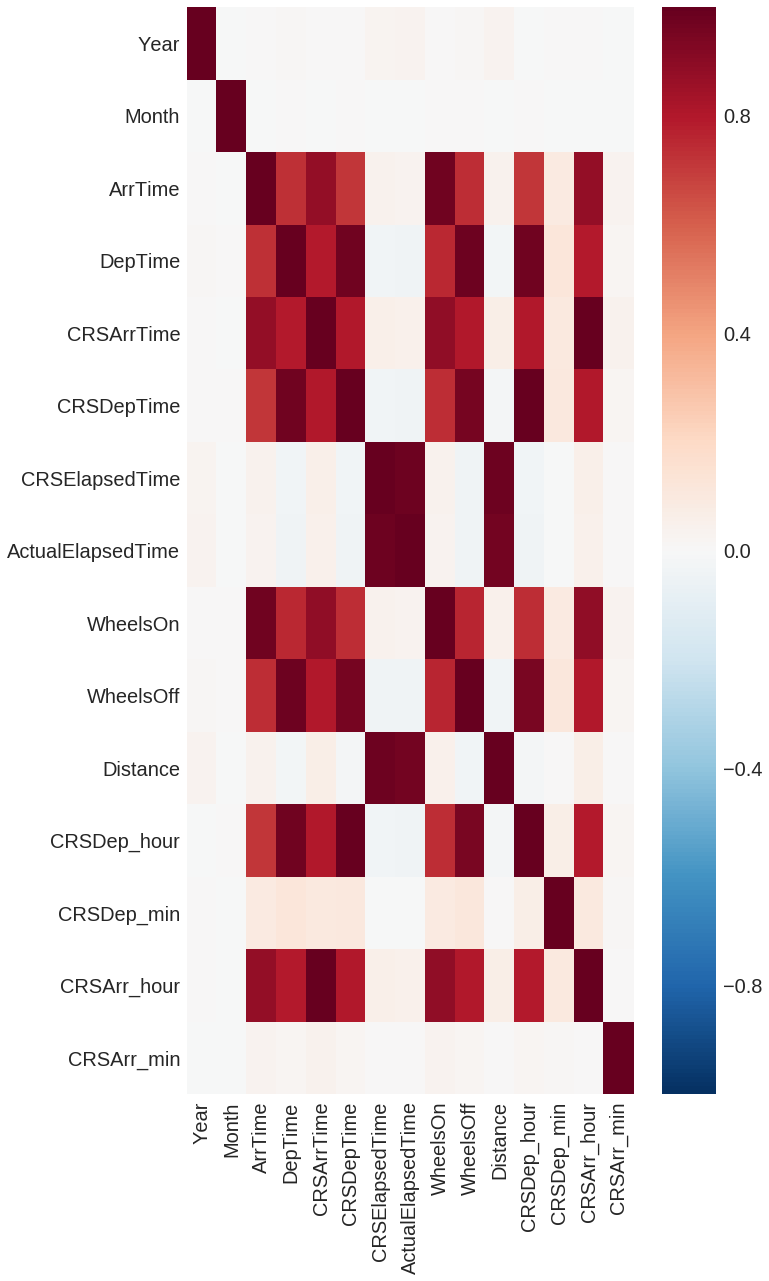

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()
plt.figure(figsize = (10,20))
sns.set(font_scale = 2)
sns.heatmap(data=df.corr())
plt.show()
plt.gcf().clear()

In [34]:
colls = ['Year', 'Month', 'Origin', 'Dest', 'Reporting_Airline', 'ArrTime',
       'DepTime', 'CRSArrTime', 'CRSDepTime', 'CRSElapsedTime',
       'ActualElapsedTime', 'WheelsOn', 'WheelsOff', 'Distance', 'Status',
       'day', 'CRSDep_hour', 'CRSDep_min', 'CRSArr_hour', 'CRSArr_min',
       'Scheduled_Dep_T', 'Scheduled_Arr_T']
len(colls)

colls.remove('Status')
len(colls)

21

In [0]:
X = df[colls]
y = df['Status']

In [36]:
X.dtypes

Year                   int64
Month                  int64
Origin                object
Dest                  object
Reporting_Airline     object
ArrTime              float64
DepTime              float64
CRSArrTime             int64
CRSDepTime             int64
CRSElapsedTime       float64
ActualElapsedTime    float64
WheelsOn             float64
WheelsOff            float64
Distance             float64
day                   object
CRSDep_hour            int64
CRSDep_min             int64
CRSArr_hour            int64
CRSArr_min             int64
Scheduled_Dep_T       object
Scheduled_Arr_T       object
dtype: object

In [37]:
df

Year  Month Origin Dest Reporting_Airline  ArrTime  DepTime  \
0        2013      1    DFW  JFK                9E   1451.0   1038.0   
1        2013      1    DFW  JFK                9E   1459.0   1037.0   
2        2013      1    DFW  JFK                9E   1515.0   1035.0   
3        2013      1    DFW  JFK                9E   1455.0   1037.0   
4        2013      1    DFW  JFK                9E   1446.0   1044.0   
5        2013      1    DFW  JFK                9E   1502.0   1054.0   
6        2013      1    DFW  JFK                9E   1504.0   1036.0   
7        2013      1    DFW  JFK                9E   1520.0   1036.0   
8        2013      1    DFW  JFK                9E   1525.0   1042.0   
9        2013      1    DFW  JFK                9E   1509.0   1034.0   
10       2013      1    DFW  JFK                9E   1506.0   1042.0   
11       2013      1    DFW  JFK                9E   1520.0   1045.0   
12       2013      1    DFW  JFK                9E   1607.0   1116.0   
13       2013      1    DFW  JFK                9E   1953.0   1538.0   
14       2013      1    DFW  JFK                9E   1520.0   1059.0   
15       2013      1    JFK  DFW                9E     29.0   1939.0   
16       2013      1    JFK  DFW                9E   2333.0   1848.0   
17       2013      1    JFK  DFW                9E   1925.0   1617.0   
18       2013      1    JFK  DFW                9E   1926.0   1643.0   
19       2013      1    JFK  DFW                9E   1929.0   1610.0   
20       2013      1    JFK  DFW                9E   1916.0   1603.0   
21       2013      1    JFK  DFW                9E   1852.0   1606.0   
22       2013      1    JFK  DFW                9E   2025.0   1612.0   
23       2013      1    JFK  DFW                9E   1932.0   1605.0   
24       2013      1    JFK  DFW                9E   1856.0   1601.0   
25       2013      1    JFK  DFW                9E   1852.0   1614.0   
26       2013      1    JFK  DFW                9E   2021.0   1609.0   
27       2013      1    JFK  DFW                9E   1946.0   1600.0   
28       2013      1    JFK  DFW                9E   1955.0   1614.0   
29       2013      1    JFK  DFW                9E   1936.0   1603.0   
...       ...    ...    ...  ...               ...      ...      ...   
1881786  2014      2    RDU  LGA                MQ   1533.0   1419.0   
1881787  2014      2    RDU  LGA                MQ   1535.0   1417.0   
1881788  2014      2    RDU  LGA                MQ   1620.0   1450.0   
1881789  2014      2    RDU  LGA                MQ   1653.0   1454.0   
1881790  2014      2    RDU  LGA                MQ   1537.0   1417.0   
1881791  2014      2    RDU  LGA                MQ      NaN      NaN   
1881792  2014      2    RDU  LGA                MQ   1547.0   1430.0   
1881793  2014      2    RDU  LGA                MQ   1545.0   1418.0   
1881794  2014      2    RDU  LGA                MQ   1600.0   1428.0   
1881795  2014      2    RDU  LGA                MQ   1603.0   1416.0   
1881796  2014      2    RDU  LGA                MQ   1615.0   1432.0   
1881797  2014      2    RDU  LGA                MQ   1613.0   1449.0   
1881798  2014      2    RDU  LGA                MQ   1539.0   1417.0   
1881799  2014      2    BNA  DCA                MQ    951.0    636.0   
1881800  2014      2    BNA  DCA                MQ    905.0    629.0   
1881801  2014      2    BNA  DCA                MQ      NaN      NaN   
1881802  2014      2    BNA  DCA                MQ    923.0    636.0   
1881803  2014      2    BNA  DCA                MQ   1346.0   1113.0   
1881804  2014      2    BNA  DCA                MQ    901.0    634.0   
1881805  2014      2    BNA  DCA                MQ    926.0    639.0   
1881806  2014      2    BNA  DCA                MQ    923.0    640.0   
1881807  2014      2    BNA  DCA                MQ      NaN      NaN   
1881808  2014      2    BNA  DCA                MQ    928.0    638.0   
1881809  2014      2    BNA  DCA                M

In [0]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

X['carrier'] = label_encoder.fit_transform(X['Reporting_Airline'])
X['origin'] = label_encoder.fit_transform(X['Origin'])
X['dest'] = label_encoder.fit_transform(X['Dest'])

X = X._get_numeric_data()

In [39]:
X.shape[1]

18

Feature ranking:
1. feature 1 (0.250092)
2. feature 2 (0.154778)
3. feature 0 (0.125871)
4. feature 7 (0.045717)
5. feature 10 (0.044092)
6. feature 13 (0.043659)
7. feature 6 (0.043440)
8. feature 5 (0.042660)
9. feature 3 (0.042191)
10. feature 9 (0.042055)
11. feature 8 (0.042045)
12. feature 11 (0.041782)
13. feature 4 (0.040920)
14. feature 12 (0.040699)


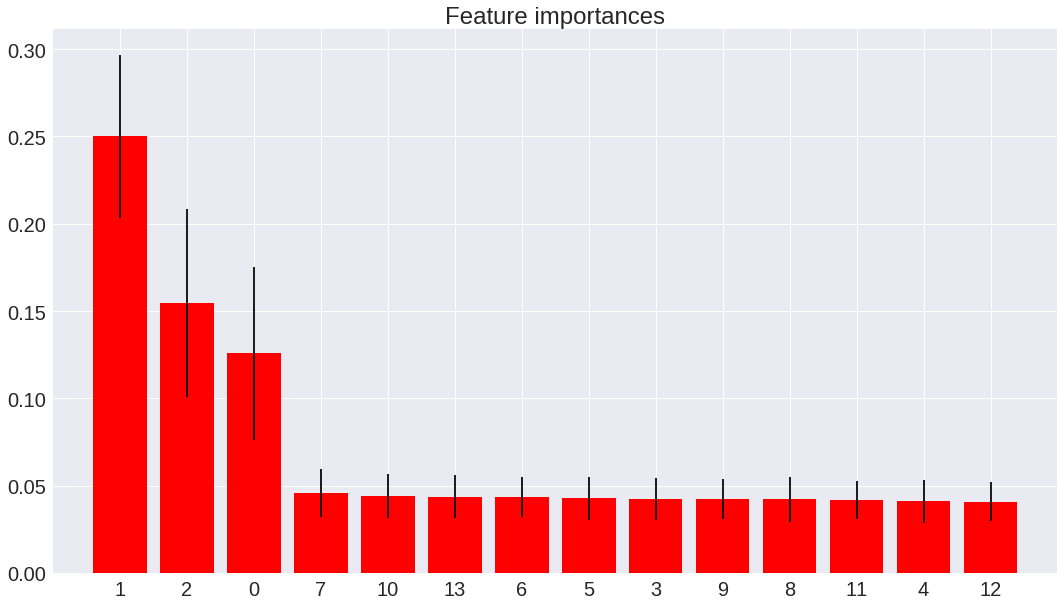

In [40]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=14,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f],importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(figsize=(18, 10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [41]:
X

array([[ 0.24983722,  2.07999753, -2.41574285, ...,  1.1524328 ,
        -0.20515407,  1.67435428],
       [-0.48628731,  2.43254818, -2.81984222, ..., -1.18427125,
         0.9759933 , -1.65494387],
       [ 0.13037419,  1.37164964, -1.48661612, ...,  0.99674704,
        -1.44200591,  0.37850032],
       ...,
       [ 1.41550613,  1.62240137,  0.14416404, ..., -0.72132784,
         1.16822804,  0.13078656],
       [ 0.51261898,  2.19777832,  1.17804109, ..., -0.2223259 ,
         1.13429386, -0.22705352],
       [ 1.57168812,  0.69350518,  0.90266833, ...,  0.35898823,
        -0.5963807 , -0.07535013]])

In [0]:
from sklearn.model_selection import train_test_split

y = np.ravel(y)
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30,random_state=0)

In [46]:
X_train

array([[ 2.74572275,  0.43498689,  0.20051022, ...,  0.5368784 ,
         1.03047838, -1.44478814],
       [ 2.49213509,  0.4470424 , -0.12856901, ...,  2.16355604,
        -0.09137739, -0.45617763],
       [-0.63993348,  0.42168755, -1.18828195, ..., -0.5502136 ,
         0.14160444, -0.33617822],
       ...,
       [ 1.14090824, -0.27966809,  0.98925312, ..., -1.58730781,
        -0.70222045, -0.37040448],
       [-1.23568775, -0.96767414,  1.32281987, ..., -0.70465751,
         0.08325568,  0.72716676],
       [ 1.37387755, -1.15724073,  0.70900047, ...,  0.04569694,
        -1.22619922, -0.01339561]])

In [0]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb =gnb.fit(X_train,y_train)

Testing Acc: 72.33333333333334
Confusion Matrix
[[ 91  43]
 [ 40 126]]


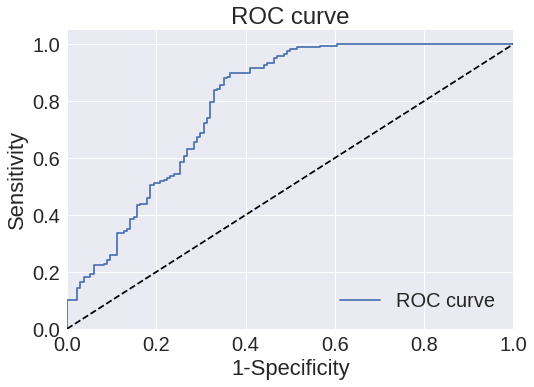

In [48]:
y_pred = gnb.predict(X_test)
print('Testing Acc:',gnb.score(X_test,y_test)*100)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

preds = gnb.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, preds)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [50]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = svm.SVC(gamma='scale')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('Testing Acc:',clf.score(X_test,y_test)*100)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve



Testing Acc: 86.0
Confusion Matrix
[[123  11]
 [ 31 135]]


Testing Accuracy 88.0
Confusion Matrix
[[124  10]
 [ 26 140]]


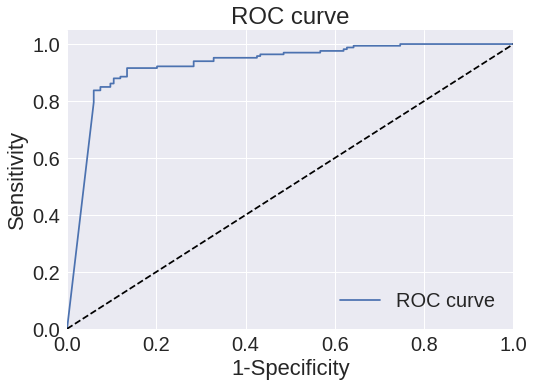

In [51]:
from sklearn.neural_network import MLPClassifier

nn3 = MLPClassifier(hidden_layer_sizes=(10,5,2),max_iter=400,verbose=False)
nn3= nn3.fit(X_train, y_train)

accuracy = nn3.score(X_train, y_train)

print('Testing Accuracy',nn3.score(X_test,y_test)*100)

# Run the model on the test set
y_pred = nn3.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

preds = nn3.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, preds)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

Accuracy:  0.9657142857142857
0.8633333333333333
[[118  16]
 [ 25 141]]


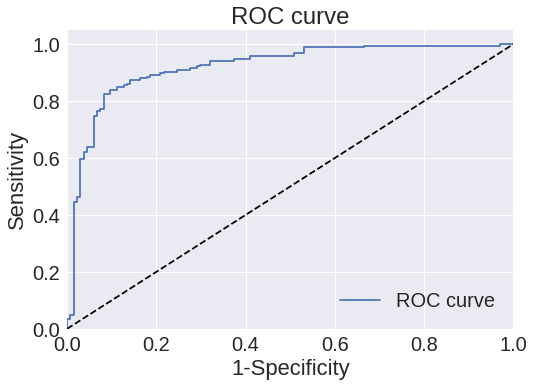

In [52]:
from sklearn.ensemble import RandomForestClassifier

rt = RandomForestClassifier(max_depth =7,random_state=0)
model1 = rt.fit(X_train, y_train)

accuracy = rt.score(X_train, y_train)
print('Accuracy: ',accuracy)

#Run the model on the test set
y_pred = rt.predict(X_test)
print(rt.score(X_test,y_test))
estimator = model1.estimators_

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

preds = rt.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, preds)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

Testing Accuracy 76.0
Confusion matrix
[[106  28]
 [ 44 122]]


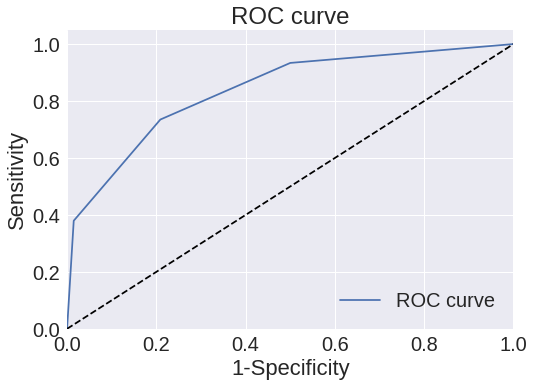

In [55]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train) 
accuracy = neigh.score(X_train, y_train)

#Run the model on the test set
y_pred = neigh.predict(X_test)
print('Testing Accuracy',neigh.score(X_test,y_test)*100)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix')
print(cm)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

preds = neigh.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, preds)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

Testing Acc: 82.33333333333334
Confusion Matrix
[[110  24]
 [ 29 137]]


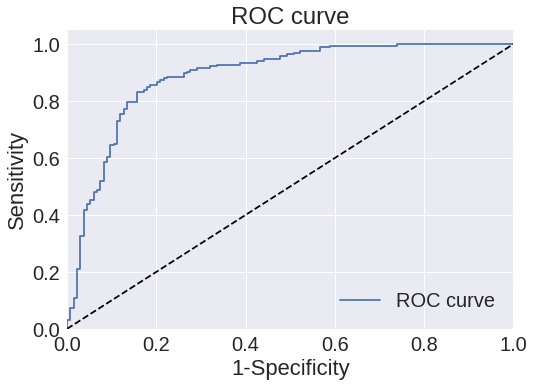

In [56]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)
clf.fit(X_train,y_train)
#Run the model on the test set
y_pred = clf.predict(X_test)
print('Testing Acc:',clf.score(X_test,y_test)*100)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

preds = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, preds)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
